In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import ascii 
import astropy.coordinates as coord 
import astropy.units as u 
import ephem 
import sys 
from astropy.coordinates import Longitude 
import matplotlib.cm as cm

In [2]:
sys.path.append("../research2017/BNS-MergerRates/data")

In [3]:
data=np.genfromtxt("../BNS-MergerRates/data/200mpc_v1_1.txt")

In [4]:
cool_cmap = cm.jet
cool_cmap.set_under("w")

In [5]:
ra=data[:,0]*u.deg
ra.wrap_angle=180*u.deg
dec=data[:,1]*u.degree
mass=data[:,7]

In [6]:
sele=(np.where(mass>6) and np.where(mass<14))

In [7]:
mass[sele].shape

(433415,)

In [1]:
def plot_mwd(ra,dec):
    """creates map of average number of galaxies in each pixel of the sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    font = {'family': 'helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=300,vmax=40,cmap=cool_cmap)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Average number of galaxies per pixel",fontdict=font)
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

In [2]:
plot_mwd(np.radians(ra.value),np.radians(dec.value))

NameError: name 'np' is not defined

In [48]:
def plot_mass(ra,dec,mass):
    """creates map of average mass per pixel in sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=300,C=mass,vmin=9,vmax=12,cmap=cool_cmap)#reduce_C_function=np.sum
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Average galactic stellar mass per pixel")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

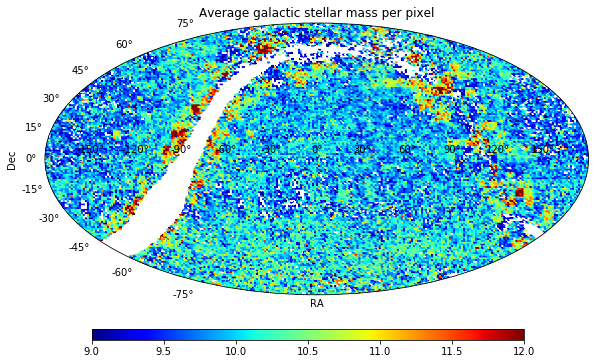

In [49]:
plot_mass(np.radians(ra[sele].value),np.radians(dec[sele].value),mass[sele])

In [12]:
def calcRate(reticMass, retTime, totalMass, mass): #mass of Reticulum II, lookback-time of event, total mass of dwarf galaxies with high resolution spectroscopy analysis, mass array
    """Calculate rate of BNS merger events in a given galaxy, taking Reticulum II as base case"""
    rateRet=(1/totalMass)*(1/retTime) #10**(-15) BNS merger event per stellar mass per year in Ret II
    relMass=10**mass/reticMass #relative stellar mass: stellar mass ration between galaxy and Ret II 
    rate=rateRet*relMass #rate of events for each galaxy
    return rate

In [33]:
(1/totalMass)*(1/((13.82*10**9)-(10.08*10**9)))

2.3958752611504036e-15

In [34]:
rateArray=calcRate(2.6*10**3,((1.382*10**10)-(10**9)),totalMass,mass)

In [18]:
print(rateArray)

[  1.69618974e-09   1.07022337e-09   1.69618974e-09 ...,   2.13537637e-04
   6.75265299e-10   1.07022337e-13]


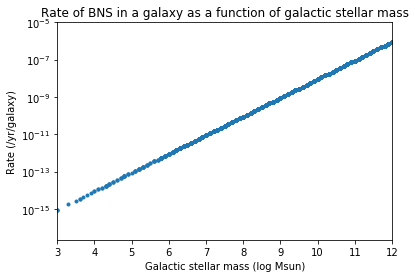

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(mass,rateArray,'.')
ax.set_title("Rate of BNS in a galaxy as a function of galactic stellar mass")
ax.set_yscale('log')
ax.set_xlabel('Galactic stellar mass (log Msun)')
ax.set_ylabel('Rate (/yr/galaxy)')
ax.set_xlim((3,12))
ax.set_ylim((0,10**(-5)))
plt.show()

In [9]:
#Stellar masses of ultra-faint dwarf galaxies with high resolution spectroscopy analysis.

HorI=2.4*10**3;
BooI=29*10**3;
BooII=10**3;
RetII=2.6*10**3;
ComBer=3.7*10**3;
CVnII=7.9*10**3;
Her=37*10**3;
Segue1=0.34*10**3;
Segue2=0.86*10**3;
UMaII=4*10**3;
LeoIV=19*10**3;
TucII=3*10**3;
TucIII=0.8*10**3;
totalMass=HorI+BooI+BooII+RetII+ComBer+CVnII+Her+Segue1+Segue2+UMaII+LeoIV+TucII+TucIII;
totalMass

111600.0

In [35]:
def plot_rate(ra,dec,mass):
    """Plot average rate of BNS merger events in every pixel of sky"""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=400,C=calcRate(2.6*10**3,((1.382**10)-(1.008**10)),totalMass,mass),vmax=0.0000003,cmap=cool_cmap)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Average event rates per pixel")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

In [36]:
plot_rate(np.radians(ra.value),np.radians(dec.value),mass)

KeyboardInterrupt: 

In [ ]:
def plot_cNumber(ra,dec):
    """creates map of cumulative number of galaxies in each pixel of the sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=300,reduce_C_function=np.sum,vmax=20,cmap=cool_cmap)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Integrated number of galaxies per pixel")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

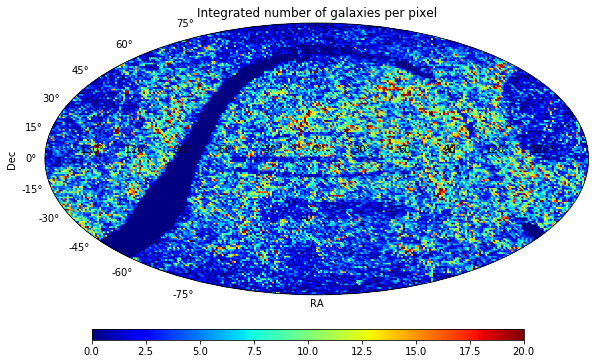

In [18]:
plot_cNumber(np.radians(ra.value),np.radians(dec.value))

In [59]:
def plot_cMass(ra,dec,mass):
    """creates map of cumulative mass per pixel in sky"""
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    #ax.scatter(ra,dec)
    hb=ax.hexbin(ra,dec,gridsize=300,C=10**mass,reduce_C_function=np.sum,cmap=cool_cmap,bins='log')
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Integrated stellar mass per pixel")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

In [82]:
plot_cMass(np.radians(ra.value),np.radians(dec.value),mass)

KeyboardInterrupt: 

In [37]:
def plot_cRate(ra,dec,mass):
    """Plot cumulative rate of BNS merger events in every pixel of sky"""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="mollweide")
    hb=ax.hexbin(ra,dec,gridsize=300,C=calcRate(2.6*10**3,((13.82*10**9)-(10.08*10**9)),totalMass,mass),reduce_C_function=np.sum,bins='log',vmin=10**(-11),vmax=10**(-7),cmap=cool_cmap)
    cb=fig.colorbar(hb,orientation='horizontal',cax=fig.add_axes([0.2, 0, 0.6, 0.03]))
    ax.set_title("Integrated number of event rates per pixel")
    ax.set_xlabel("RA")
    ax.set_ylabel("Dec")
    plt.show()

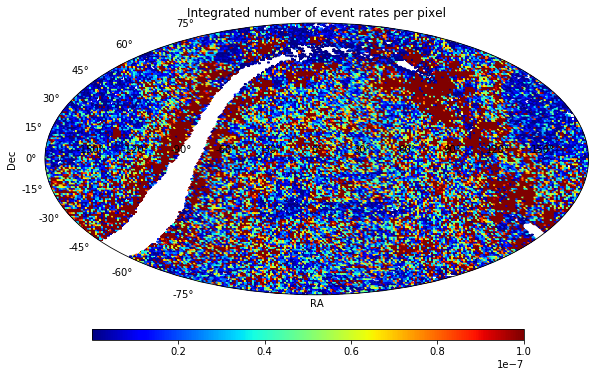

In [38]:
plot_cRate(np.radians(ra.value),np.radians(dec.value),mass)

In [7]:
import healpy
pix=healpy.ang2pix(64,ra.value,dec.value,lonlat=True)
hpmap=np.zeros(healpy.nside2npix(64))
np.add.at(hpmap,pix,1)

In [50]:
print(hpmap)

[ 0.  0.  0. ...,  0.  0.  0.]


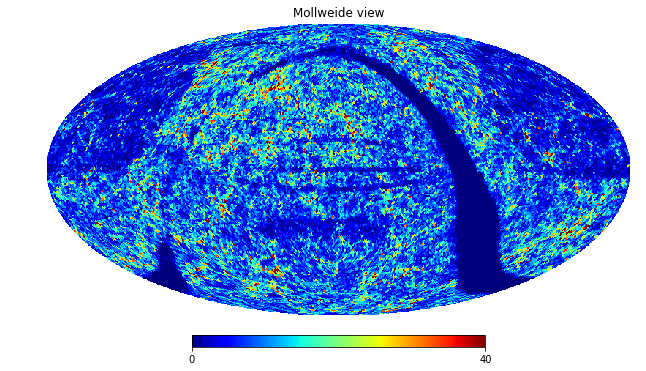

In [13]:
healpy.mollview(hpmap,max=40,cmap=cool_cmap)

In [90]:
Mass200mpc=np.nansum(hpmap)

In [92]:
np.nansum(10**mass)

2.5248932200009547e+43

In [86]:
rate200Mpc=Mass200mpc*(1/totalMass)*(1/((13.82*10**9)-(10.08*10**9)))

In [87]:
rate200Mpc

6.0493292028466706e+28

In [14]:
len(ra)

435294